**3.1 Classification Task**

In [40]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [41]:
# 3.1 Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
# 3.1 Model building and evaluation
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE

In [43]:
# Load Dataset
df = pd.read_csv('/content/drive/MyDrive/3rd SEM/AI/Final_CourseWork/MobilePrice(Classification).csv')

# Exploratory Data Analysis
print("Dataset Overview:")
print(df.info())
print(df.describe())

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   battery_power         2000 non-null   int64  
 1   bluetooth             2000 non-null   object 
 2   clock_speed           2000 non-null   float64
 3   dual_sim              2000 non-null   object 
 4   front_camera_mpixels  2000 non-null   int64  
 5   has_4g                2000 non-null   object 
 6   int_memory            2000 non-null   int64  
 7   m_dep                 2000 non-null   float64
 8   mobile_wt             2000 non-null   int64  
 9   n_cores               2000 non-null   int64  
 10  pc                    2000 non-null   int64  
 11  px_height             2000 non-null   int64  
 12  px_width              2000 non-null   int64  
 13  ram                   2000 non-null   int64  
 14  sc_h                  2000 non-null   int64  
 15  sc_

In [44]:
# Check Missing Values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
battery_power           0
bluetooth               0
clock_speed             0
dual_sim                0
front_camera_mpixels    0
has_4g                  0
int_memory              0
m_dep                   0
mobile_wt               0
n_cores                 0
pc                      0
px_height               0
px_width                0
ram                     0
sc_h                    0
sc_w                    0
talk_time               0
has_3g                  0
touch_screen            0
wifi                    0
price_range             0
dtype: int64


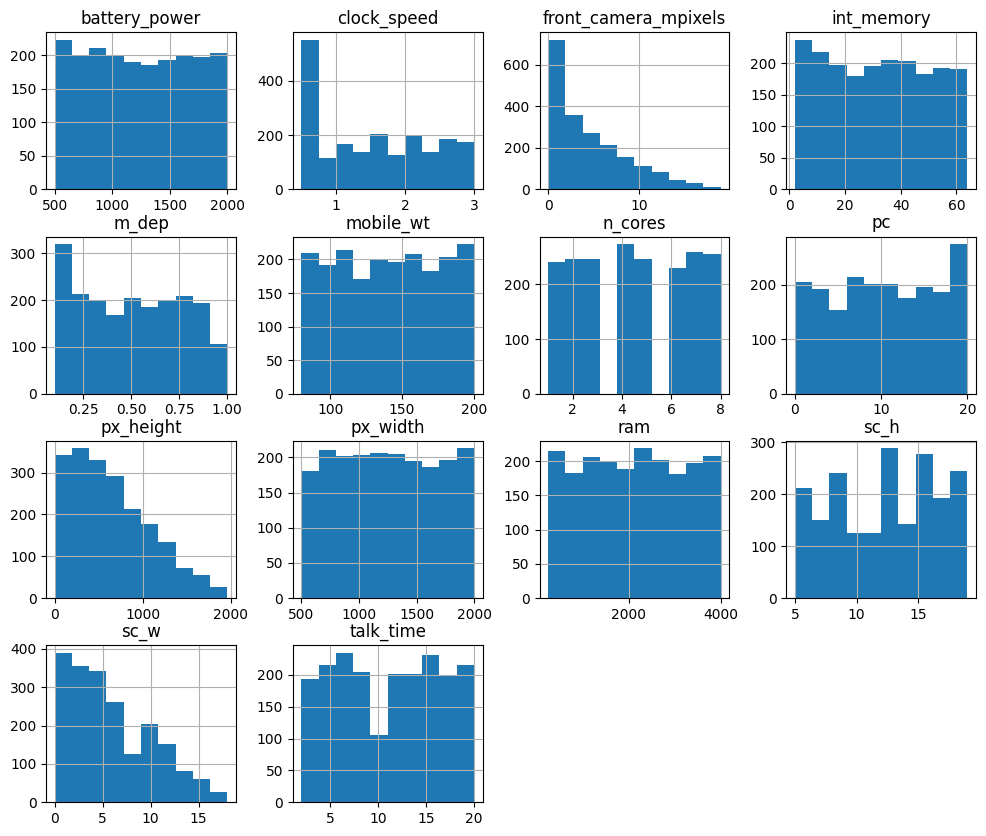

In [45]:
# Visualizing Data
df.hist(figsize=(12, 10))
plt.show()

In [46]:
# Feature and Target Selection
X = df.drop('price_range', axis=1)  # Assuming 'price_range' is the target variable
y = df['price_range']
print("Features (X):\n", X.head())  # Print first 5 rows of features
print("\nTarget (y):\n", y.head())  # Print first 5 rows of target

Features (X):
    battery_power bluetooth  clock_speed dual_sim  front_camera_mpixels has_4g  \
0            842        No          2.2       No                     1     No   
1           1021       Yes          0.5      Yes                     0    Yes   
2            563       Yes          0.5      Yes                     2    Yes   
3            615       Yes          2.5       No                     0     No   
4           1821       Yes          1.2       No                    13    Yes   

   int_memory  m_dep  mobile_wt  n_cores  pc  px_height  px_width   ram  sc_h  \
0           7    0.6        188        2   2         20       756  2549     9   
1          53    0.7        136        3   6        905      1988  2631    17   
2          41    0.9        145        5   6       1263      1716  2603    11   
3          10    0.8        131        6   9       1216      1786  2769    16   
4          44    0.6        141        2  14       1208      1212  1411     8   

   sc_w  ta

In [47]:
# Splitting Data into Train and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.dtypes)

le = LabelEncoder()
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)


battery_power             int64
bluetooth                object
clock_speed             float64
dual_sim                 object
front_camera_mpixels      int64
has_4g                   object
int_memory                int64
m_dep                   float64
mobile_wt                 int64
n_cores                   int64
pc                        int64
px_height                 int64
px_width                  int64
ram                       int64
sc_h                      int64
sc_w                      int64
talk_time                 int64
has_3g                   object
touch_screen             object
wifi                     object
dtype: object


In [48]:
# Standardizing the Data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Standardized Training Data (X_train_scaled):\n", X_train_scaled)
print("\nStandardized Testing Data (X_test_scaled):\n", X_test_scaled)

Standardized Training Data (X_train_scaled):
 [[ 1.54835969 -1.23622976  0.62011122 ...  0.55713671  0.9900495
   1.00250313]
 [-1.3795348   0.83711156 -0.99356109 ...  0.55713671  0.9900495
   1.00250313]
 [-0.01091435 -0.74838475 -0.53251186 ...  0.55713671 -1.0100505
   1.00250313]
 ...
 [ 1.33500924 -1.23622976 -0.99356109 ...  0.55713671 -1.0100505
   1.00250313]
 [ 1.55743843 -0.74838475 -0.30198725 ... -1.79489161  0.9900495
   1.00250313]
 [-1.37499543 -1.11426851 -0.76303648 ...  0.55713671 -1.0100505
  -0.99750312]]

Standardized Testing Data (X_test_scaled):
 [[ 0.91965677  1.20299532 -0.30198725 ...  0.55713671  0.9900495
  -0.99750312]
 [-0.13347738 -1.23622976  0.62011122 ...  0.55713671 -1.0100505
  -0.99750312]
 [ 1.65957429  1.69084034  1.08116045 ...  0.55713671  0.9900495
  -0.99750312]
 ...
 [-0.446694    0.34926654 -0.07146263 ...  0.55713671  0.9900495
   1.00250313]
 [-1.16391466  1.44691783 -0.99356109 ...  0.55713671  0.9900495
   1.00250313]
 [-0.12666832  0.4

Scratch Model

In [49]:
# Feature and Target Selection
X = df.drop('price_range', axis=1)  # Assuming 'price_range' is the target variable
y = df['price_range']
print("Features (X):\n", X.head())  # Print first 5 rows of features
print("\nTarget (y):\n", y.head())  # Print first 5 rows of target

# Splitting Data into Train and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.dtypes)

# Convert categorical features in X_train and X_test to numerical using one-hot encoding
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Fit the encoder to your target variable and transform it
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

# Standardizing the Data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Standardized Training Data (X_train_scaled):\n", X_train_scaled)
print("\nStandardized Testing Data (X_test_scaled):\n", X_test_scaled)

Features (X):
    battery_power bluetooth  clock_speed dual_sim  front_camera_mpixels has_4g  \
0            842        No          2.2       No                     1     No   
1           1021       Yes          0.5      Yes                     0    Yes   
2            563       Yes          0.5      Yes                     2    Yes   
3            615       Yes          2.5       No                     0     No   
4           1821       Yes          1.2       No                    13    Yes   

   int_memory  m_dep  mobile_wt  n_cores  pc  px_height  px_width   ram  sc_h  \
0           7    0.6        188        2   2         20       756  2549     9   
1          53    0.7        136        3   6        905      1988  2631    17   
2          41    0.9        145        5   6       1263      1716  2603    11   
3          10    0.8        131        6   9       1216      1786  2769    16   
4          44    0.6        141        2  14       1208      1212  1411     8   

   sc_w  ta

In [50]:
# Logistic Regression Model from Scratch
class LogisticRegressionScratch:
    def __init__(self):
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y, learning_rate=0.01, num_iterations=1000):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(num_iterations):
            linear_model = np.dot(X, self.weights) + self.bias
            predictions = self.sigmoid(linear_model)

            # Gradient Descent Updates
            dw = (1 / n_samples) * np.dot(X.T, (predictions - y))
            db = (1 / n_samples) * np.sum(predictions - y)

            self.weights -= learning_rate * dw
            self.bias -= learning_rate * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_pred_prob = self.sigmoid(linear_model)
        return np.where(y_pred_prob >= 0.5, 1, 0)

# Training Logistic Regression from Scratch.
log_reg_scratch = LogisticRegressionScratch()
log_reg_scratch.fit(X_train_scaled, y_train, learning_rate=0.01, num_iterations=1000) # Now y_train is numeric
y_pred_scratch = log_reg_scratch.predict(X_test_scaled)

print("\nLogistic Regression from Scratch:")
print(classification_report(y_test, y_pred_scratch))


Logistic Regression from Scratch:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        92
           1       0.23      0.85      0.36       105
           2       0.00      0.00      0.00        91
           3       0.00      0.00      0.00       112

    accuracy                           0.22       400
   macro avg       0.06      0.21      0.09       400
weighted avg       0.06      0.22      0.10       400



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [51]:
# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Fit the encoder to your target variable and transform it
y_encoded = label_encoder.fit_transform(y)

# Now use y_encoded instead of y for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [52]:
# Check class distribution
print("Class distribution in y_train:", np.bincount(y_train))
print("Class distribution in y_test:", np.bincount(y_test))

Class distribution in y_train: [408 395 409 388]
Class distribution in y_test: [ 92 105  91 112]


Model 1

In [53]:
# Building Models for Classification
log_reg = LogisticRegression(max_iter=1000, class_weight='balanced')
log_reg.fit(X_train_scaled, y_train)
y_pred = log_reg.predict(X_test_scaled)
print("Scikit-Learn Logistic Regression:")
print(classification_report(y_test, y_pred))


Scikit-Learn Logistic Regression:
              precision    recall  f1-score   support

           0       0.99      0.95      0.97        92
           1       1.00      0.97      0.99       105
           2       0.95      1.00      0.97        91
           3       0.97      0.99      0.98       112

    accuracy                           0.98       400
   macro avg       0.98      0.98      0.98       400
weighted avg       0.98      0.98      0.98       400



Model 2

In [54]:
# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the model
rf_classifier.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_rf = rf_classifier.predict(X_test_scaled)

# Evaluate the model
print("\nRandom Forest Classifier:")
print(classification_report(y_test, y_pred_rf))



Random Forest Classifier:
              precision    recall  f1-score   support

           0       0.80      0.87      0.83        92
           1       0.93      0.95      0.94       105
           2       0.88      0.84      0.86        91
           3       0.93      0.88      0.91       112

    accuracy                           0.89       400
   macro avg       0.89      0.89      0.88       400
weighted avg       0.89      0.89      0.89       400



In [55]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Create a RandomForestClassifier object
rf_classifier = RandomForestClassifier(random_state=42)

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Hyperparameters: {best_params}")

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}


In [56]:
# Feature selection using Recursive Feature Elimination (RFE)
rfe = RFE(estimator=LogisticRegression(max_iter=1000), n_features_to_select=5)  # Select top 5 features
rfe.fit(X_train_scaled, y_train)

# Get the selected features
selected_features = X_train.columns[rfe.support_]
print("Selected Features:", selected_features)



Selected Features: Index(['battery_power', 'has_4g', 'mobile_wt', 'n_cores', 'pc'], dtype='object')


In [57]:
# Feature selection using Recursive Feature Elimination (RFE) with RandomForestRegressor
rfe = RFE(estimator=RandomForestRegressor(n_estimators=100, random_state=42), n_features_to_select=5)
rfe.fit(X_train_scaled, y_train)

# Get the selected features
selected_features = X_train.columns[rfe.support_]
print("Selected Features:", selected_features)

Selected Features: Index(['battery_power', 'has_4g', 'mobile_wt', 'n_cores', 'pc'], dtype='object')


In [58]:
# Hyperparameter Optimization
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)
print("\nBest Hyperparameters:", grid_search.best_params_)


Best Hyperparameters: {'C': 100}


In [59]:


# Assuming X_train, X_test, y_train, y_test are already defined

# Select the best features
best_features = ['battery_power', 'px_height', 'px_width', 'ram']
X_train_best = X_train[best_features]
X_test_best = X_test[best_features]

# Create and train the Logistic Regression model with the best hyperparameter
final_model = LogisticRegression(C=100, max_iter=1000)
final_model.fit(X_train_best, y_train)

# Make predictions on the test set
y_pred_final = final_model.predict(X_test_best)

# Evaluate the model
print("\nFinal Model Performance:")
print(classification_report(y_test, y_pred_final))


Final Model Performance:
              precision    recall  f1-score   support

           0       0.96      0.95      0.95        92
           1       1.00      0.98      0.99       105
           2       0.96      1.00      0.98        91
           3       0.97      0.96      0.97       112

    accuracy                           0.97       400
   macro avg       0.97      0.97      0.97       400
weighted avg       0.97      0.97      0.97       400

